In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as Encoder
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN , AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler as Scaler
import numpy as np

df_review=pd.read_csv("C:/Users/91801/Downloads/mcdonalds.csv")
df_review.head(20)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [3]:
df_review['VisitFrequency'].value_counts()



Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [4]:
mapping = {'-3': -3, '-4': -4, '-2': -2, '-1': -1, '0': 0, '+1': 1, '+2': 2,
          '+3': 3,'+4': 4, 'I hate it!-5': -5, 'I love it!+5': 5}
df_review['Like'] = df_review['Like'].replace(mapping).apply(lambda x: int(x))
df_review['Like'].value_counts()


 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [5]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(2), object(13)
memory usage: 170.4+ KB


In [6]:
df_review.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
for col in df_review.columns:
  if 'Yes' in set(df_review[col].unique()) and 'No' in set(df_review[col].unique()):
    df_review[col] = df_review[col].replace({'Yes': 1, 'No': 0}).apply(lambda x: int(x))

In [8]:
df_review['expensive'].value_counts()

0    933
1    520
Name: expensive, dtype: int64

In [9]:
# Encoding string attributes to numerical
df_encode = df_review.copy()
for columns in ['VisitFrequency', 'Gender']:
  df_encode[columns] = Encoder().fit_transform(df_review[columns])

df_encode

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,1


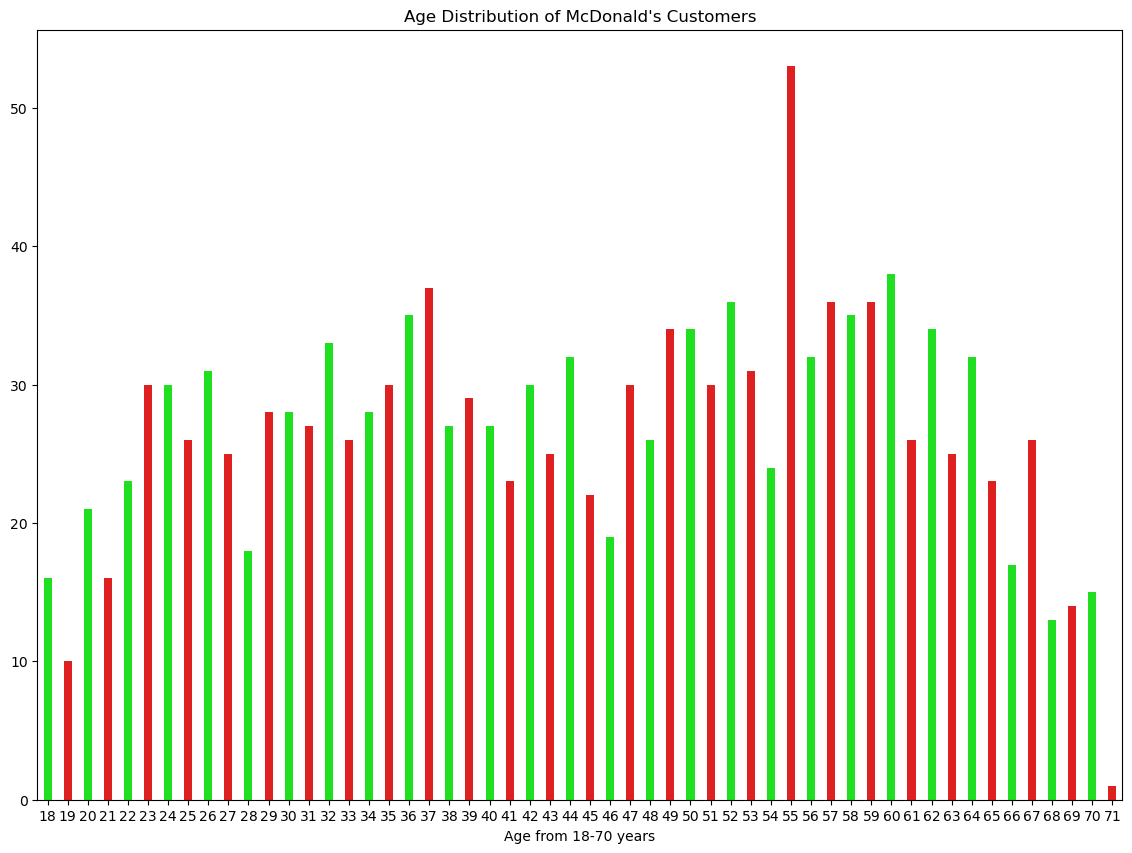

In [10]:
import warnings

warnings.filterwarnings('ignore')
age_frequency = df_review['Age'].value_counts().sort_index()

y = age_frequency.values
x = age_frequency.index

fig_kwargs = {'figsize': (14, 10)}

plt.figure(**fig_kwargs)

sns.barplot(x=x, y=y, palette=['#00ff00', '#ff0000'], width=0.4)
plt.title('Age Distribution of McDonald\'s Customers')
plt.xlabel('Age from 18-70 years')

plt.show()

Text(0.5, 1.0, 'Gender Distribution')

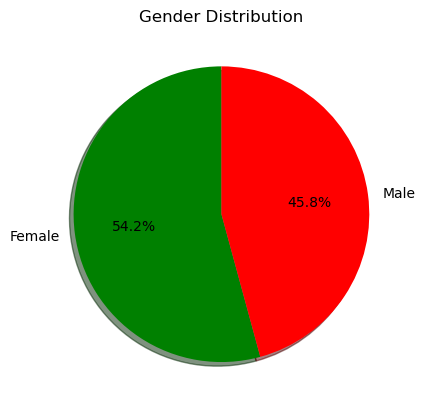

In [11]:
labels = ['Female', 'Male']
count_gender = df_review['Gender'].value_counts()

pie_kwargs = {'autopct': '%1.1f%%',
              'startangle': 90,
              'colors': ['green', 'red'],
              'shadow': True
              }

plt.pie(count_gender, labels=labels, **pie_kwargs)
plt.title('Gender Distribution')

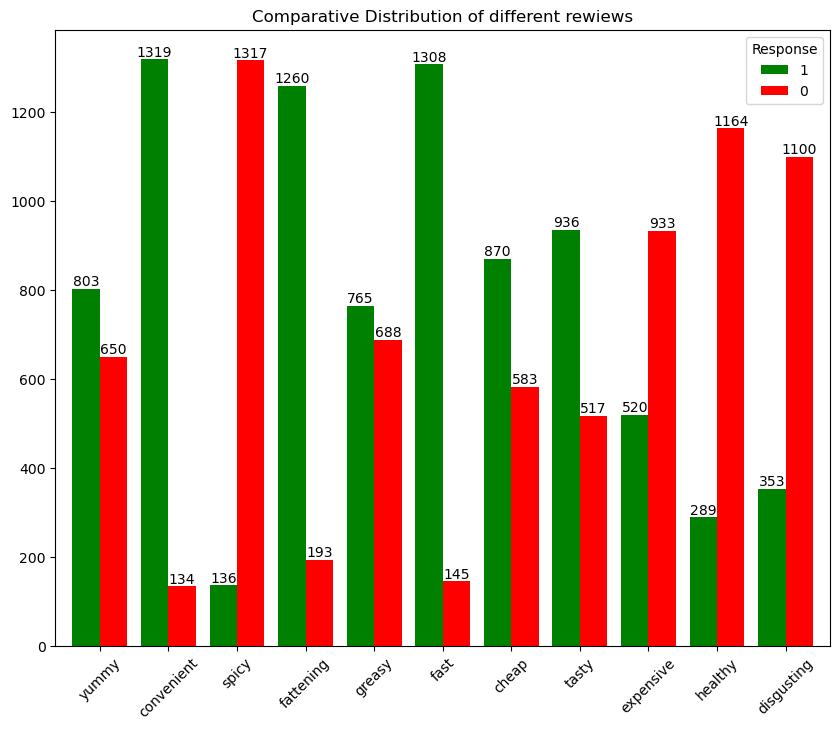

In [12]:
reviews = df_review.columns[:11]

review_measures = pd.DataFrame()
for measures in reviews:
    temp = df_review[measures].value_counts().rename_axis('Response').reset_index(name=measures)
    review_measures = pd.concat([review_measures, temp.set_index('Response')], axis=1)

z=review_measures.T.plot(kind='bar', figsize=(10, 8), width=0.8, color=['green', 'red'])
plt.title('Comparative Distribution of different rewiews')
plt.legend(title='Response')
plt.xticks(rotation=45)

patches_details = z.patches

for count, current_patch in enumerate(patches_details):
  height = current_patch.get_height()
  width = current_patch.get_width()
  x = current_patch.get_x()
  z.annotate(int(height), (x +width/ 2, height), ha='center', va='bottom')

In [13]:
kwargs = {}
df_scaled = Scaler(**kwargs).fit_transform(df_encode)

In [14]:
# PCA
component_kwargs = {'n_components': 2}
df_pca = PCA(**component_kwargs).fit_transform(df_scaled)

pca_first_component = df_pca[:, 0]
pca_second_component = df_pca[:, 1]

Text(0, 0.5, 'K-Means Inertia Valie')

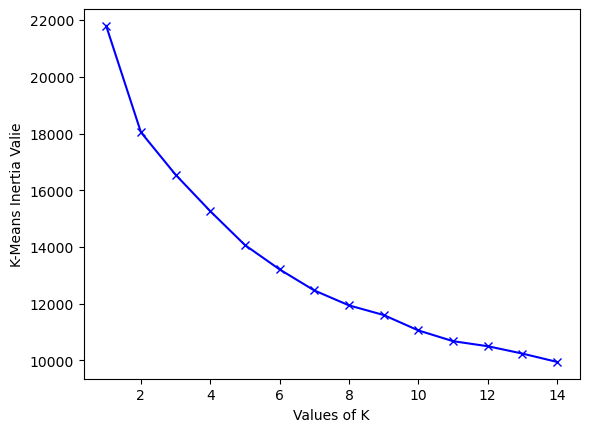

In [15]:
wcss = []

number_of_clusters = list(range(1, 15))

# Elbow Method
# Perform k-means clustering
for number_of_cluster in number_of_clusters:
  kmeans = KMeans(n_clusters=number_of_cluster, n_init=10, random_state=0)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)



plt.plot(number_of_clusters, wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('K-Means Inertia Valie')

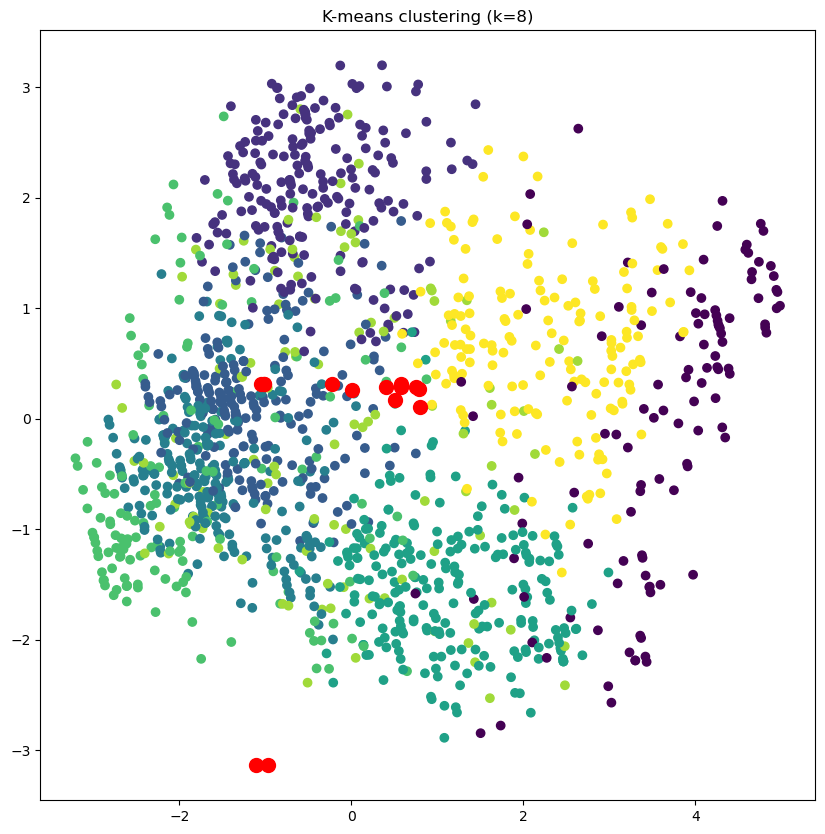

In [16]:
# Perform k-means clustering for 4 segments
plt.figure(figsize = (10, 10))

cluster_optimal = {'n_clusters': 8, 'n_init': 10, 'random_state': 0}
kmeans_current_model = KMeans(**cluster_optimal)
kmeans_predicted = kmeans_current_model.fit_predict(df_scaled)

# Plot
plt.scatter(pca_first_component,
            pca_second_component,
            c=kmeans_predicted)

# Cluster Center
plt.scatter(kmeans.cluster_centers_[:, 0],\
            kmeans.cluster_centers_[:, 1], \
            s=100, c='red')

plt.title('K-means clustering (k={})'.format(8))
plt.show()

Unique Cluster  23


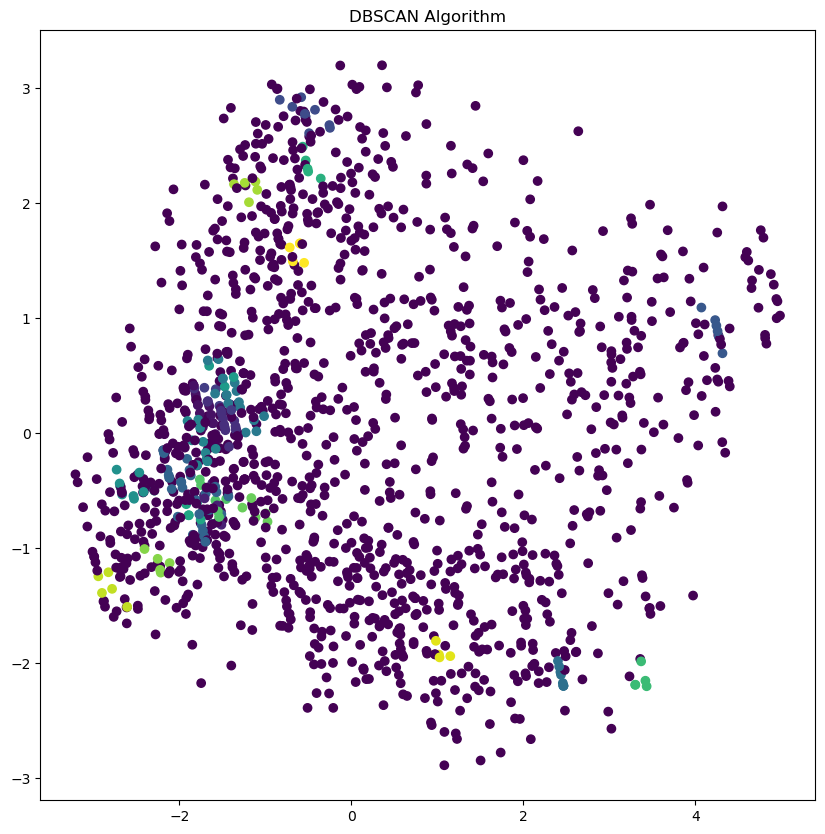

In [17]:
plt.figure(figsize = (10, 10))

db_scan_optimized = DBSCAN(eps=0.5, min_samples=5)
db_prediction = db_scan_optimized.fit_predict(df_scaled)

print('Unique Cluster ', len(set(db_prediction)))

# Plot
plt.scatter(pca_first_component,
            pca_second_component,
            c=db_prediction)

plt.title('DBSCAN Algorithm')
plt.show()

Unique Cluster  8


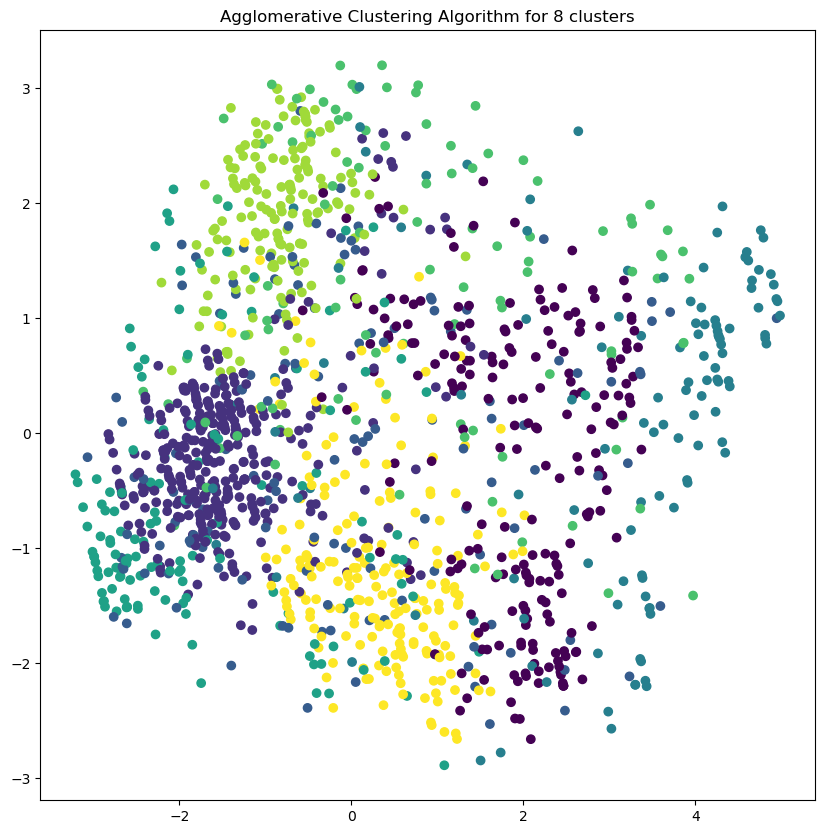

In [18]:
plt.figure(figsize = (10, 10))


agglo_8_cluster = AgglomerativeClustering(n_clusters=8)
agglo_8_cluster_prediction = agglo_8_cluster.fit_predict(df_scaled)

print('Unique Cluster ', len(set(agglo_8_cluster_prediction)))
# Plot
plt.scatter(pca_first_component,
            pca_second_component,
            c=agglo_8_cluster_prediction)

plt.title('Agglomerative Clustering Algorithm for 8 clusters')
plt.show()

Unique Cluster  23


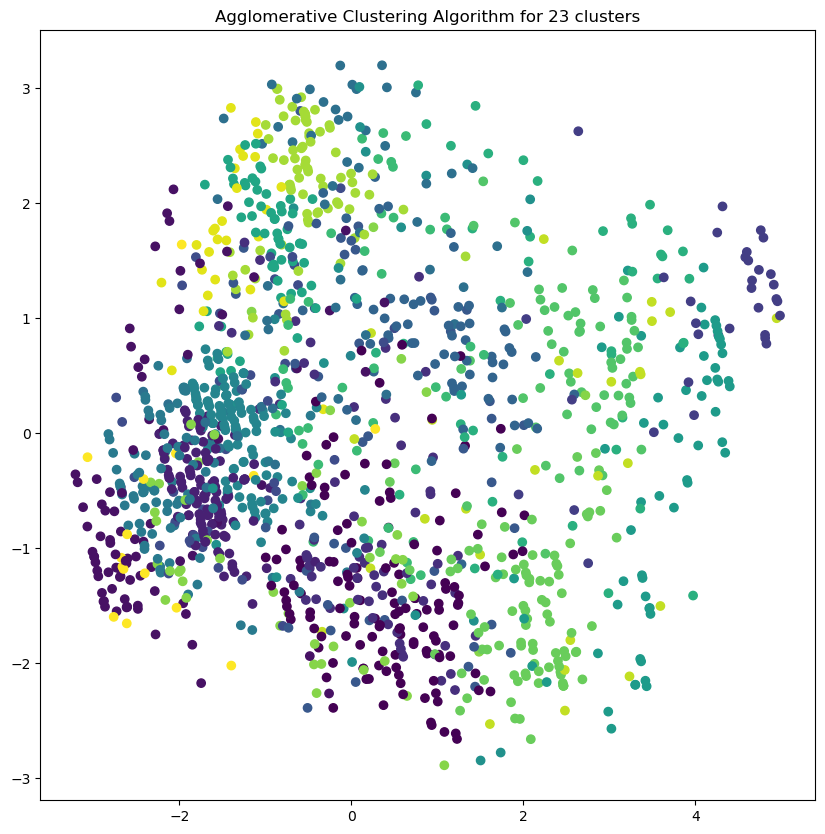

In [19]:
plt.figure(figsize = (10, 10))

agglo_23_cluster = AgglomerativeClustering(n_clusters=23)
agglo_23_cluster_prediction = agglo_23_cluster.fit_predict(df_scaled)

print('Unique Cluster ', len(set(agglo_23_cluster_prediction)))
# Plot
plt.scatter(pca_first_component,
            pca_second_component,
            c=agglo_23_cluster_prediction)

plt.title('Agglomerative Clustering Algorithm for 23 clusters')
plt.show()